In [133]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()
import math

ibmqfactory.load_account:WARNING:2020-10-11 19:03:41,856: Credentials are already in use. The existing account in the session will be replaced.


In [135]:
sides = int(input("Please enter the number of sides of your die: "))


Please enter the number of sides of your die: 6


In [136]:
def qubit_calculator(n):
    result = 0
    while n != 1:
        result = result + 1
        n = math.ceil(n/2)
    return result

In [137]:
Qubits=Cbits = qubit_calculator(sides)

In [138]:
qc = QuantumCircuit(Qubits,Cbits) #Qubits and Cbits would be equal  
for i in range(0,qubit_calculator(sides)):
    qc.h(i)# Adds the Hagamard gate to each Qubit

In [139]:
qc.measure(range(Qubits),range(Cbits))

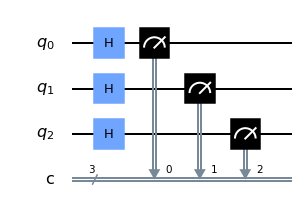

In [140]:
qc.draw()

In [234]:
def random_number_pick():
    backend = Aer.get_backend('qasm_simulator')
    job_simulator = execute(qc, backend, shots = 1)
    result_simulator = job_simulator.result()
    counts = result_simulator.get_counts(qc)
    return counts

In [235]:
def roll():
    counts = random_number_pick()
    outcome = int(list(counts.keys())[0],2)+1
    while outcome > sides:
        counts = random_number_pick()
        outcome = int(list(counts.keys())[0],2)+1
    return outcome


In [239]:
from qiskit.visualization import plot_histogram

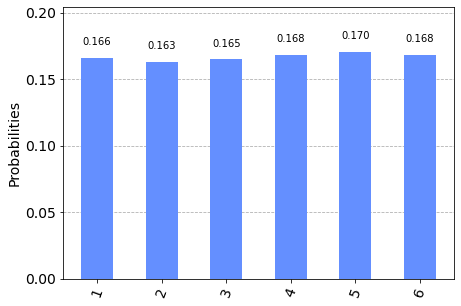

In [246]:
outcome_distribution = {}
for i in range(0,10000):
    value = roll()
    if value in outcome_distribution:
        outcome_distribution[value] = outcome_distribution[value] + 1
    else:
        outcome_distribution[value] = 0
plot_histogram(outcome_distribution)

319 350.0
